### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
row_missing=len(data[data.isna().any(axis=1)])
total_row=len(data)
print('Number of row contains missing value: ' + str( row_missing))
print('Missing value %: ' + str(row_missing/ total_row))


Number of row contains missing value: 12576
Missing value %: 0.9914853358561968


In [5]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
'''it looks like the column car has most of the missing values. In this case, it doesn't make sense to
apply missing value imputation in this contains. Rather, this column should be eliminated. while other
columns could be imputed
 '''

"it looks like the column car has most of the missing values. In this case, it doesn't make sense to\napply missing value imputation in this contains. Rather, this column should be eliminated. while other\ncolumns could be imputed\n "

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
# Drop car column
data=data.drop('car', axis=1)
# impute the missing value with word 'Missing'
for i in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    # data[i]= data[i].fillna(data[i].mode()[0])
    data[i]= data[i].fillna('Missing')
# data[data.isna().any(axis=1)]

4. What proportion of the total observations chose to accept the coupon? 



In [68]:
Coupon_prop= round(data.groupby('Y')[['Y']].count() / len(data) *100,2)

print("Proportion of total observation chose to accept the coupon: {}%".format(Coupon_prop.iloc[1][0]))

Proportion of total observation chose to accept the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, ' Bar Chart for Type of Coupon')

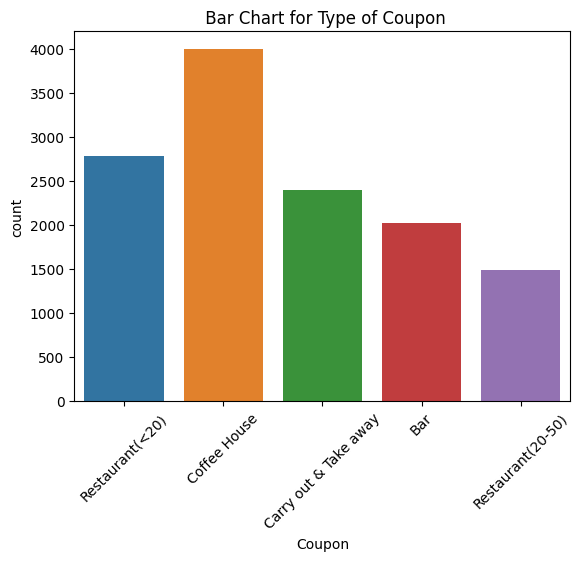

In [94]:
sns.countplot(data=data, x='coupon')
plt.xticks(rotation=45)
plt.xlabel('Coupon')
plt.title(' Bar Chart for Type of Coupon')

6. Use a histogram to visualize the temperature column.

Text(0.5, 0, 'Temperature')

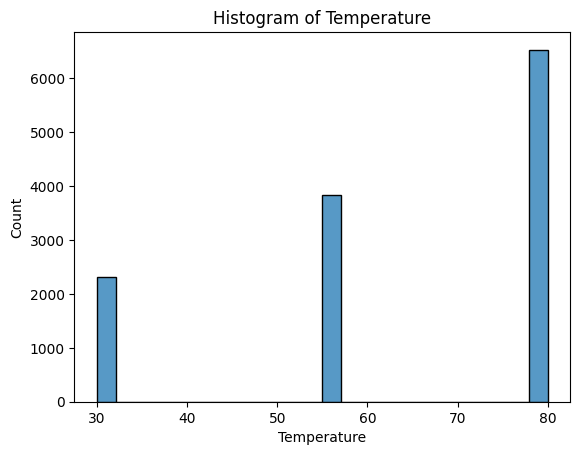

In [95]:
sns.histplot(data, x='temperature')
plt.title("Histogram of Temperature")
plt.xlabel('Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [90]:
df_bar=data[data.coupon=='Bar']

2. What proportion of bar coupons were accepted?


In [92]:
Coupon_prop_bar= round(df_bar.groupby('Y')[['Y']].count() / len(df_bar) *100,2)

print("Proportion of total observation chose to accept the coupon: {}%".format(Coupon_prop_bar.iloc[1][0]))

Proportion of total observation chose to accept the coupon: 41.0%


Text(0.5, 1.0, ' Bar Coupon Acceptance')

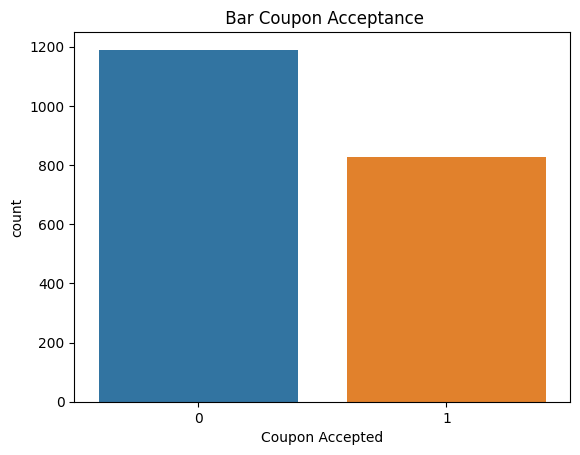

In [98]:
sns.countplot(data=df_bar, x='Y', )
plt.xlabel('Coupon Accepted')
plt.title(' Bar Coupon Acceptance')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [119]:
# df_bar['Bar_3L']=np.where(df_bar.Bar.isin(['less1', '1~3']), '<3',
                        #   np.where(df_bar.Bar=='never', 'never', '>=3'))
df_bar['Bar_3L']=np.where(df_bar.Bar.isin(['less1', '1~3', 'never']), '<3','>=3')


/var/folders/15/zmd7cx2538151mv3b5ftl2680000gp/T/ipykernel_36645/3112059316.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
df_1=df_bar.groupby(['Bar_3L','Y'])[['destination']].count().reset_index()
df_1.rename(columns={'destination': 'Count'}, inplace=True)

In [162]:
px.bar(df_1, x='Bar_3L', y='Count', color='Y', barmode='group', 
       title='Coupon Acceptance Distribution for Social Drinkers vs Occasion Drinker',
       labels={'Bar_3L':'Bar Visits'})
# plt.title(" Coupon Acceptance Distribution for Social Drinkers vs Occasion Drinker")
# plt.xlabel("Bar Visit")


In [178]:
df_2=df_bar.groupby(['Bar_3L'])[['Y']].sum()
df_2_cnt=df_bar.groupby(['Bar_3L'])[['Y']].count()
df_prop_drinker=df_2/df_2_cnt
df_prop_drinker.reset_index(inplace=True)

In [188]:
fig= px.bar(df_prop_drinker, x='Bar_3L', y='Y', barmode='group', 
       title='Coupon Acceptance Rate for Social Drinkers vs Occasion Drinker',
       labels={'Bar_3L':'Bar Visits', 'Y':' Acceptant Rate'})
fig.update_yaxes(tickformat=".1%")


### Answer: 
Base on the graph shown above, frequent drinker who visited the bar with 3 times or more are more likely to acept the coupon vs those who dont

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [207]:
ind_interest=data.Bar.isin(['1~3', 'gt8', '4~8']) & data.age.isin(['46', '31', '41', '50plus', '36'])
data['Age_25_one_bar']=ind_interest

In [209]:
df_2=data.groupby(['Age_25_one_bar'])[['Y']].sum()
df_2_cnt=data.groupby(['Age_25_one_bar'])[['Y']].count()
df_interset=df_2/df_2_cnt
df_interset.reset_index(inplace=True)

In [211]:
fig= px.bar(df_interset, x='Age_25_one_bar', y='Y', barmode='group', 
       title='Coupon Acceptance Rate for Age 25+ and Visit bar at least once a month',
       labels={'Age_25_one_bar':'Age 25+ and visit bar at least once a month', 'Y':' Acceptant Rate'})
fig.update_yaxes(tickformat=".1%")



### Answer: 
Base on the graph shown above, people who visits bar at least one a month and age 25+ is more likely to accept the coupon. However, the differene is minimal and 
may not be statistial importane

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [225]:
ind_interest=data.Bar.isin(['1~3', 'gt8', '4~8']) & (data.passanger!='Kid(s)') & (~data.occupation.isin(['Farming Fishing & Forestry']))
data['interest']=ind_interest

In [289]:
df_2=data.groupby(['interest'])[['Y']].sum() 
# df_2.reset_index(inplace=True)
df_2_cnt=data.groupby(['interest'])[['Y']].count()
df_interset=df_2/df_2_cnt
df_interset.reset_index(inplace=True)

In [292]:
fig= px.bar(df_interset, x='interest', y='Y', barmode='group', 
       title='Coupon Acceptance Rate for driver w/ 1+ to bar with no kids and occupation other than Farming',
       labels={'interest':'1+ to bar with no kids and occupation other than Farming', 'Y':' Acceptant Rate'})
fig.update_yaxes(tickformat=".1%")



### Answer: 
Base on the graph shown above, the answer is basically the same as question 5. However, more deeper analysis needs to be done

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [245]:
# go to bar >=1, passenger not a kid and were not a widow:
Ind_1st = (data.Bar.isin(['1~3', 'gt8', '4~8'])) & (data.passanger!='Kid(s)') & (data.maritalStatus!='Widowed')

# go to bar >=1, age<30
Ind_2nd = (data.Bar.isin(['1~3', 'gt8', '4~8'])) & (data.age.isin(['21', '26', 'below21']))

# go to cheap restaurant >=4 and income <50k
Ind_3rd = (data.RestaurantLessThan20.isin(['4~8', 'gt8'])) & (data.income.isin(['$37500 - $49999', '$12500 - $24999','$25000 - $37499','Less than $12500' ]))

data['interest1']=Ind_1st
data['interest2']=Ind_2nd
data['interest3']=Ind_3rd

In [275]:
# data.groupby(['interest1','interest2', 'interest3'])[['Y']].sum()
df_in=data.groupby('Y')[['interest1','interest2', 'interest3']].sum().T.reset_index()
df_in.rename(columns={'index': 'group', 0:'No', 1:'Yes'}, inplace=True)
df_in['Acceptance_rate']=df_in.Yes/(df_in.Yes+df_in.No)

In [293]:
df_in

Y,group,No,Yes,Acceptance_rate
0,interest1,1393,2303,0.623106
1,interest2,845,1427,0.628081
2,interest3,910,1369,0.600702


In [294]:
fig= px.bar(df_in, x='group', y='Acceptance_rate', barmode='group', 
       title='Coupon Acceptance Rate Comparison',
       labels={'group':'comparison Group', 'Acceptance_rate':' Acceptant Rate'})
fig.update_yaxes(tickformat=".1%")


### Answer:
This look like intereste group2 (go to bart at least once a month and under age 30 is) are more likely to accept the coupon. However, interest group1 is also very close. follow by interest group3

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

###
Based on the observation above, the acceptance rate can be varies due to a couple factors:
1. The volume of each type of coupons as Coffee House offer a lot of these coupon but the population where it is targeting might have a lot of non coffee drinker 
2. People who tend to go to the bar more often are tend to accept the coupon
3. People who dont have a kid tend to accept the coupon
4. People who is single tend to accept the coupon

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [297]:
df_to=data[data.coupon=='Carry out & Take away']


In [339]:
df_to.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'Age_25_one_bar', 'interest', 'interest1',
       'interest2', 'interest3'],
      dtype='object')

In [367]:
col_interest = ['passanger', 'weather', 'temperature', 'expiration', 'maritalStatus', 'age', 'occupation', 'income']
df_out=[]

for i in col_interest:
    df_norm=pd.DataFrame(df_to.groupby(i)[['Y']].value_counts(normalize=True)).reset_index()
    df_norm.rename(columns={0:'Acceptance Rate'}, inplace=True)
    df_norm=df_norm[df_norm.Y==1]
    df_norm['Feature']=i
    df_norm.rename(columns={i:'feature_value'}, inplace=True)
    df_out.append(df_norm)

df_out_ap=pd.concat(df_out)

In [366]:
df_out_ap.head()

,feature_value,Y,Acceptance Rate,Feature
0,Alone,1,0.727402,passanger
2,Friend(s),1,0.757781,passanger
4,Kid(s),1,0.703947,passanger
6,Partner,1,0.731959,passanger
0,Rainy,1,0.611285,weather


In [378]:
# Acceptance rate for feature in passanger, weather, tempuerature, expiration
fig=px.bar(df_out_ap[df_out_ap.Feature.isin(['passanger', 'weather', 'temperature', 'expiration'])], 
           x='feature_value', y='Acceptance Rate', color='Feature', text_auto=True, title='Take out Acceptance rate for Passanger, weather, temperature, expiration')
fig.update_yaxes(tickformat=".1%")

In [379]:
# Acceptance rate for feature in martial status, age income
fig=px.bar(df_out_ap[df_out_ap.Feature.isin(['maritalStatus', 'age', 'income'])], 
           x='feature_value', y='Acceptance Rate', color='Feature', text_auto=True,
            title='Take out Acceptance rate for Marital Status, Age, Income')
fig.update_yaxes(tickformat=".1%")

In [380]:
# Acceptance rate for feature in occupation
fig=px.bar(df_out_ap[df_out_ap.Feature.isin(['occupation'])], 
           x='feature_value', y='Acceptance Rate', color='feature_value', text_auto=True,
            title='Take out Acceptance rate for Occupation')
fig.update_yaxes(tickformat=".1%")